# Кластеризация студентов (K-means (t-SNE))
Выбранный набор данных состоит из оценок, полученных учащимися по 3 предметам, и различных факторов. 

Выбранный набор данных состоит из оценок, полученных учащимися по 3 предметам ("math", "reading" и "writing"), и различных факторов, а именно:

•	Пол – м., ж.

•	Раса / этническая принадлежность – A, B, C, D, E.

•	Уровень образования родителей – несколько колледжей, средняя школа, несколько средних школ, степень младшего специалиста, степень бакалавра, степень магистра.

•	Вид ланча – стандартный, бесплатный / льготный.

•	Курс подготовки к экзаменам – завершен, отсутствует.

### Цель кластеризации:

Понять влияние опыта родителей, подготовки к экзаменам и т. д. на успеваемость студентов. Тем самым выявив основные факторы, присущие условным отличникам, для:

•	составления более точной таблицы рекомендаций при поступлении в данное учебное заведение (УЗ); 

    a.	Курс подготовки к экзаменам – так ли сильно влияет курс на дальнейшую успеваемость студентов?
    b.	Уровень образования родителей – существенны ли наставления и помощь родителей при обучении в УЗ?
    
•	правильного распределению бюджета внутри УЗ;

    a.	Вид ланча – важен ли студентам их ланч и как это связано с их успеваемостью? 
    b.	Раса / этническая принадлежность – необходимо ли создавать отдельные потоки обучающихся, основанные на этнической принадлежности, и поддерживать меньшинства (влияние буллинга на успеваемость)? 
    c.	Пол – аналогично пункту b, но по отношению к половому признаку.
    
•	личной оценки абитуриентов самих себя.

    a.	[Все перечисленные факторы] – оценить свои перспективы и возможности в предстоящем учебном процессе в данном УЗ.

#### Ссылка на датасет
http://roycekimmons.com/tools/generated_data/exams

------

In [444]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
from scipy.spatial.distance import pdist, squareform
warnings.simplefilter(action='ignore')

from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


plt.style.use('ggplot')
orange_black = ['#fdc029', '#df861d', 'FF6347', '#aa3d01', '#a30e15', '#800000', '#171820']
plt.rcParams['figure.figsize'] = (10,5) 
plt.rcParams['figure.facecolor'] = '#FFFACD' 
plt.rcParams['axes.facecolor'] = 'FFFFE0' 
plt.rcParams['axes.grid'] = True 
plt.rcParams['grid.color'] = orange_black[3]
plt.rcParams['grid.linestyle'] = '--' 


url = '/Users/pavelzurkin/Desktop/exams.csv'
df = pd.read_csv(url)
print(f'Строк в DS: {df.shape[0]}\nСтолбцов в DS: {df.shape[1]}')
df

Строк в DS: 1000
Столбцов в DS: 8


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,free/reduced,none,65,79,71
1,female,group B,associate's degree,free/reduced,none,39,52,51
2,male,group D,high school,free/reduced,none,54,57,55
3,male,group C,associate's degree,free/reduced,none,83,81,70
4,female,group D,some high school,standard,completed,53,64,63
...,...,...,...,...,...,...,...,...
995,male,group C,associate's degree,free/reduced,none,59,68,64
996,female,group C,some high school,standard,completed,94,94,95
997,male,group D,some college,standard,none,75,68,74
998,female,group C,some high school,standard,completed,61,71,75


Можно заметить, что для оценки успешности обучения студента берутся такие признаки, как «math score», «reading score» и «writing score», соответствующие оценкам конкретного студента по каждой из дисциплин. Объектами являются непосредственно студенты, обучающиеся в УЗ.

-----------

Матрица объект-объект

In [445]:
df_obj = pdist(X_df, 'euclidean')
matrix_obj_obj = pd.DataFrame(data = squareform(df_obj))
matrix_obj_obj

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000000,42.638011,30.016662,18.547237,21.330729,16.124515,40.472213,17.464249,20.273135,17.635192,...,21.748563,6.855655,25.651511,16.522712,14.730920,14.866069,40.816663,15.297059,10.954451,42.095130
1,42.638011,0.000000,16.763055,56.053546,22.203603,31.304952,24.738634,52.009614,23.216374,58.694122,...,21.610183,45.133136,65.848311,32.449961,36.755952,28.792360,82.060953,45.803930,37.815341,84.011904
2,30.016662,16.763055,0.000000,40.681691,11.224972,17.058722,17.233688,36.276714,12.569805,44.384682,...,10.954451,32.526912,51.662365,16.792856,25.416530,15.491933,67.697858,31.032241,25.670995,70.249555
3,18.547237,56.053546,40.681691,0.000000,35.341194,26.495283,46.281746,7.141428,34.655447,10.535654,...,35.312887,19.261360,18.493242,24.145393,28.017851,27.946377,30.397368,16.248077,24.859606,33.406586
4,21.330729,22.203603,11.224972,35.341194,0.000000,11.090537,26.514147,31.240999,2.449490,36.959437,...,5.477226,23.280893,43.897608,13.490738,16.124515,8.000000,60.058305,25.357445,16.093477,62.072538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14.866069,28.792360,15.491933,27.946377,8.000000,6.708204,28.017851,24.331050,7.348469,30.133038,...,8.602325,17.549929,37.643060,7.874008,13.490738,0.000000,53.581713,19.261360,11.958261,55.632724
996,40.816663,82.060953,67.697858,30.397368,60.058305,51.478151,75.418831,33.361655,59.050826,24.392622,...,61.180062,37.802116,16.552945,51.623638,47.063787,53.581713,0.000000,38.755645,44.922155,6.480741
997,15.297059,45.803930,31.032241,16.248077,25.357445,14.966630,38.183766,11.090537,24.799194,16.643317,...,25.670995,15.716234,23.237900,15.842980,15.716234,19.261360,38.755645,0.000000,15.165751,41.521079
998,10.954451,37.815341,25.670995,24.859606,16.093477,11.045361,38.600518,20.952327,15.000000,23.302360,...,18.466185,9.110434,28.740216,15.066519,5.196152,11.958261,44.922155,15.165751,0.000000,46.818800


In [447]:
print(f'Наибольшее расстояние между объектами {matrix_obj_obj.max().index.max()} и {matrix_obj_obj.max().idxmax()}: {matrix_obj_obj.max().max()}')


Наибольшее расстояние между объектами 999 и 291: 141.6827441857335


----

Сводка по оценкам студентов:

In [448]:
print(f'Количество нулевых значений {df.isna().sum().sum()}')
df.describe()

Количество нулевых значений 0


,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,65.957000,68.862000,67.591000
std,15.701901,15.012272,15.804161
min,15.000000,17.000000,15.000000
25%,55.000000,58.000000,57.000000
50%,66.000000,69.000000,68.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [449]:
numeric = ['math score','reading score','writing score']
categorical = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


-------

### Предварительный анализ DF
Построим некоторое количество графиков для более ясной картины анализируемого датафрейма

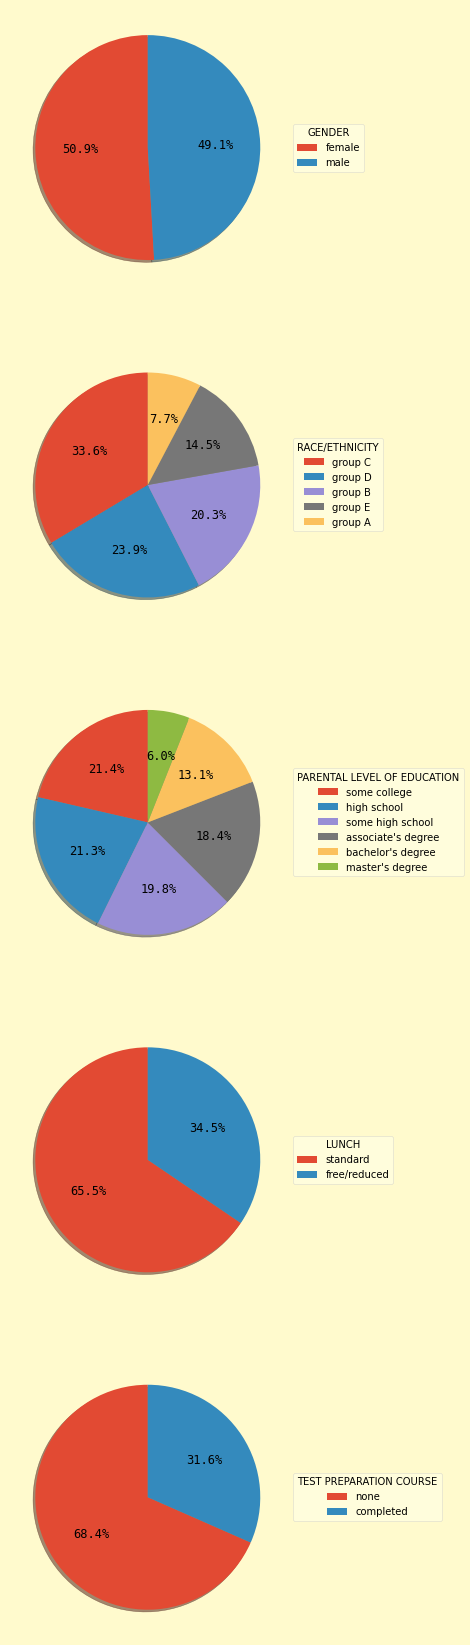

In [450]:
plt.figure(figsize=(15,30))
for i in range(1,6):
    plt.subplot(5,1,i)
    labels = df[categorical[i-1]].value_counts().index
    sizes = df[categorical[i-1]].value_counts().values

    colors = ["#ffb3b3",'#c78d8d',"#C2C4E2",'#8082a8']
    plt.pie(sizes, autopct='%1.1f%%', shadow=True,
            startangle=90, textprops={"fontsize":12, 'fontfamily':'monospace'})
    plt.legend(labels,
               loc='center left',
               title="{}".format(categorical[i-1].upper()),
               bbox_to_anchor=(1, 0, 0.5, 1))

------

### Определим кластеры для всех студентов

И для начала добавим к data frame все столбцы в числовом формате.

In [451]:
data = {}
X_df = df[numeric]
for col in categorical:
    data[col] = pd.get_dummies(df[col]) # конвертим в числовые значения
    X_df = pd.concat([X_df, data[col]], axis = 1) # добавляем к X_df новые столбцы
X_df

,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none
0,65,79,71,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
1,39,52,51,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
2,54,57,55,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
3,83,81,70,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4,53,64,63,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,68,64,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
996,94,94,95,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
997,75,68,74,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
998,61,71,75,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


------

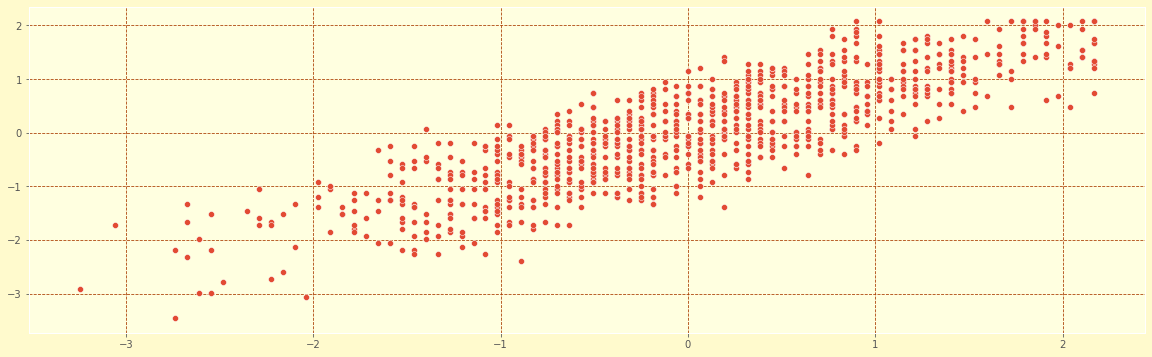

In [452]:
X = scale(X_df) # приводим к одному порядку
plt.figure(figsize=(20,6))
sns.scatterplot(X[:,0], X[:,1]) # двумерное представление 
plt.show()

Как можем заметить, после графического представления взятого ранее датафрейма невозможно даже "на глаз" определить количество и тем более границы кластеров. Поэтому необходимо уменьшить размерность, используя метод t-SNE.

------

Перплексия – описывает ожидаемую плотность вокруг каждой точки или, другими словами, устанавливает соотношение целевого количества ближайших соседей к интересующей точке. Низкое значение заставляет алгоритм фокусироваться на меньшем количестве соседей, что приводит ко множеству небольших групп. Напротив, высокое значение перплексии расширяет горизонт соседства, что приводит к уменьшению числа более плотно упакованных групп.

Реализуем t-SNE на нашем датафрейме с перплексией равной 100.

In [453]:
tsne = TSNE(verbose=1, perplexity=100, random_state=70) # verbose - вывод подробных рассчетов 
X_embedded = tsne.fit_transform(X) # обучили модель 

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.078s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.398094
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.727276
[t-SNE] KL divergence after 1000 iterations: 0.824559


Уменьшение размерности: t-SNE


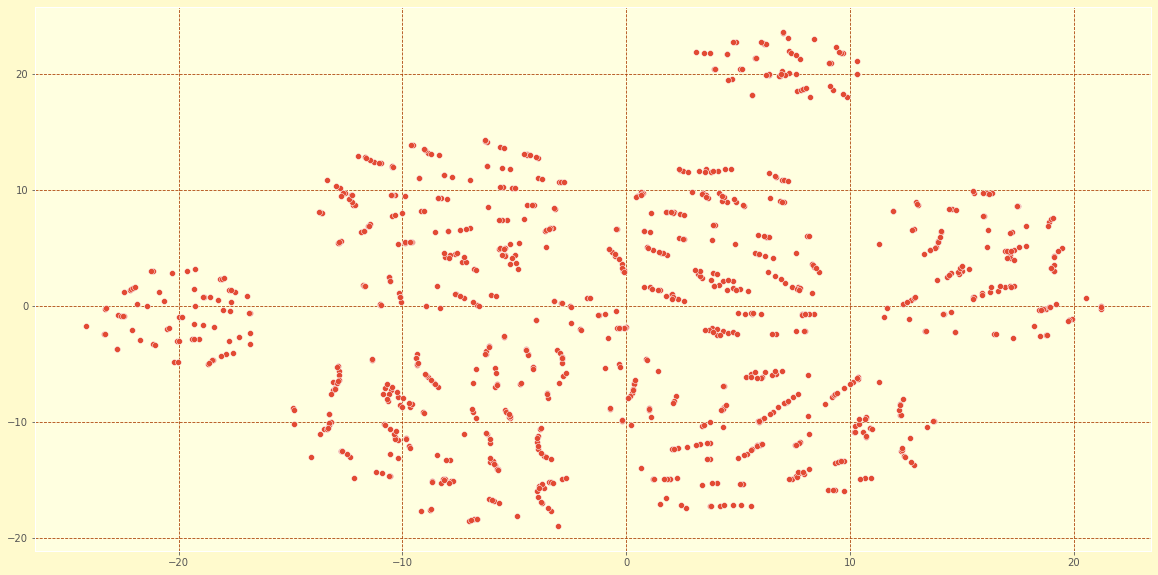

In [454]:
plt.figure(figsize=(20,10))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1])
print('Уменьшение размерности: t-SNE')
plt.show()

Таким образом размерность входных данных была уменьшена, что позволяет визуально определить приблизительное количество кластеров (около 8) и провести кластеризацию методом K-средних.

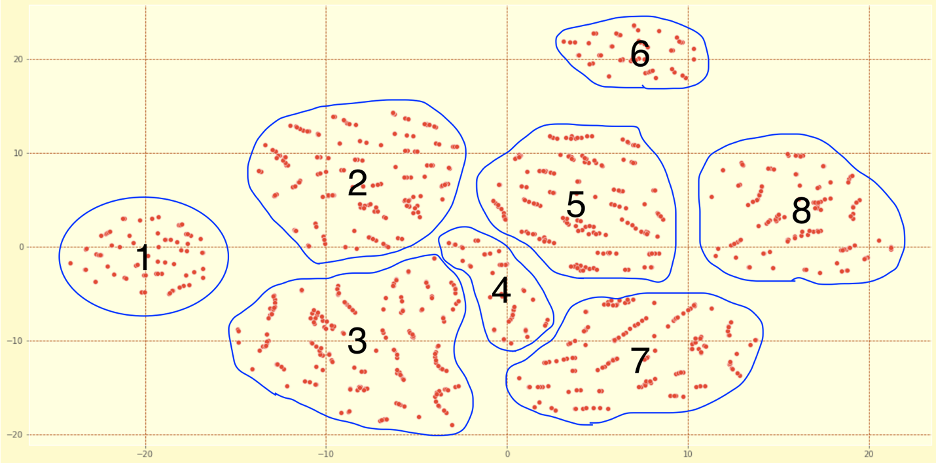


----

Для кластеризации был выбран метод K-means, но у данного метода есть свои особенности:

•	Метод чувствителен к выбору центров кластеров, к порядку переобхода (для переобхода будем использовать несколько итераций определения центров кластеров).

•	Метод хорошо работает на хорошо разделенных кластерах типа плотных сферических скоплений (в случае нечеткого разделения кластеров необходимо будет использовать методы уменьшения размерности).

•	Чувствителен к шуму и выбросам.

По своей природе метод K-means действует по алгоритму, который стремится минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров.

Он разбивает множество элементов векторного пространства на заранее известное число кластеров k. И основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.

Алгоритм завершается, когда на какой-то итерации не происходит изменения внутрикластерного расстояния. Это происходит за конечное число итераций, так как количество возможных разбиений конечного множества конечно, а на каждом шаге суммарное квадратичное отклонение уменьшается, поэтому зацикливание невозможно.

Центроиды:
[[-19.706821   -1.0984137]
 [ 16.176111    3.241557 ]
 [  6.7002244 -11.23687  ]
 [  6.8877654  20.710142 ]
 [ -4.6096277  -3.4463408]
 [ -8.125015    8.248183 ]
 [ -8.4376335 -12.152511 ]
 [  4.0849123   4.5643044]]

Количество предсказанных значений: 1000

Кластеризация: K-means


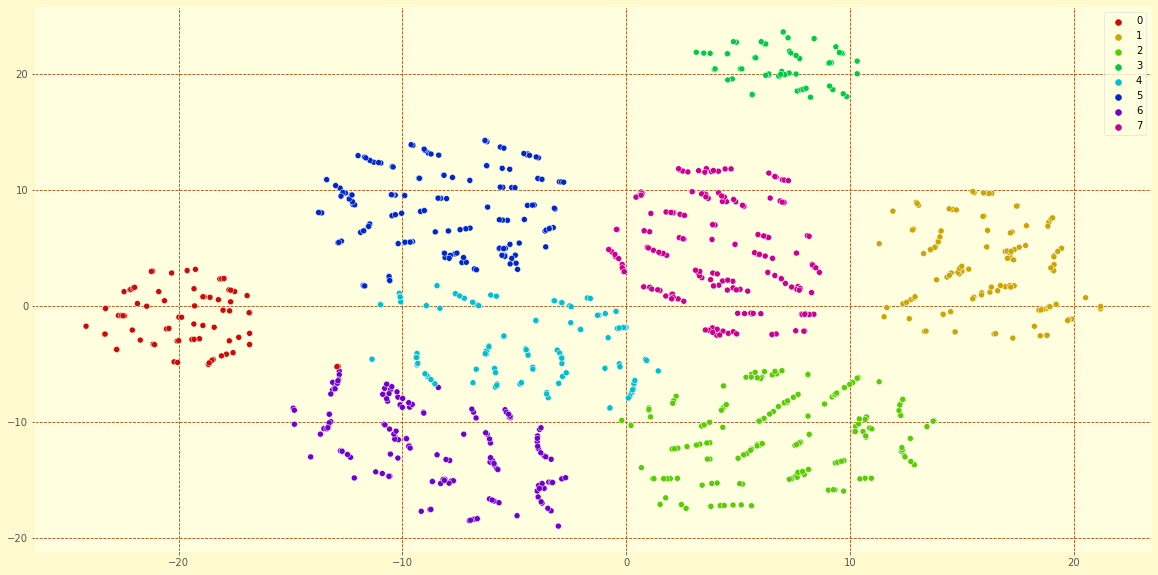

In [455]:
n_clstr = 8
cluster = KMeans(n_clusters = n_clstr)
cluster.fit(X_embedded) # обучаем модель
y_pred = cluster.predict(X_embedded) # записываем предсказанные значения (кластеры) в переменную
print(f'Центроиды:\n{cluster.cluster_centers_}')
print(f'\nКоличество предсказанных значений: {y_pred.size}')

palette = sns.hls_palette(n_clstr, l = 0.4, s = 1)
plt.figure(figsize = (20,10))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue = y_pred, palette = palette)
print('\nКластеризация: K-means')
plt.show()

-------

In [456]:
df['cluster'] = y_pred
print(f'Количество нулевых значений в df: {df.isna().sum().sum()}')
df

Количество нулевых значений в df: 0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluster
0,female,group D,some college,free/reduced,none,65,79,71,7
1,female,group B,associate's degree,free/reduced,none,39,52,51,5
2,male,group D,high school,free/reduced,none,54,57,55,6
3,male,group C,associate's degree,free/reduced,none,83,81,70,5
4,female,group D,some high school,standard,completed,53,64,63,2
...,...,...,...,...,...,...,...,...,...
995,male,group C,associate's degree,free/reduced,none,59,68,64,5
996,female,group C,some high school,standard,completed,94,94,95,2
997,male,group D,some college,standard,none,75,68,74,7
998,female,group C,some high school,standard,completed,61,71,75,2


------

### Анализ результатов

Диаграмма рассеяния - один из самых простых и полезных графиков. Модуль seaborn в Python может пойти дальше таких графиков и использовать их для представления категориальных значений.

График роя - это тип графика рассеяния, который используется для представления категориальных значений. Он очень похож на ленточный график, но позволяет избежать наложения точек. 

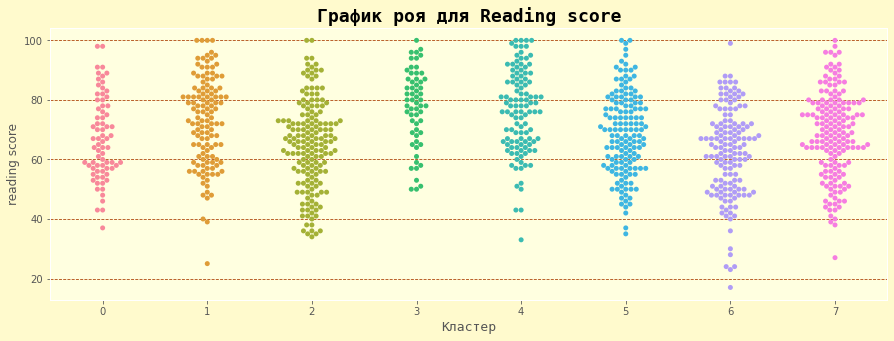

In [457]:
plt.figure(figsize=(15,5))
sns.swarmplot(data=df, x='cluster', y='reading score')
plt.title("График роя для Reading score" , size=18, fontweight='bold', fontfamily='monospace')
plt.xlabel("Кластер", size=13, fontweight='light', fontfamily='monospace')
plt.show()

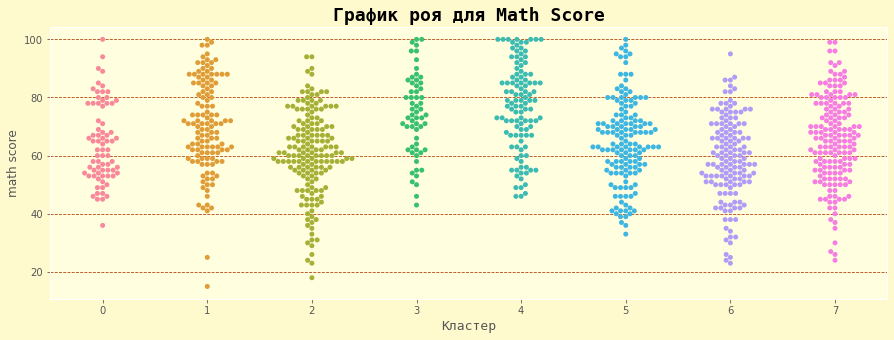

In [458]:
plt.figure(figsize=(15,5))
sns.swarmplot(data=df, x='cluster', y='math score')
plt.title("График роя для Math Score" , size=18, fontweight='bold', fontfamily='monospace')
plt.xlabel("Кластер", size=13, fontweight='light', fontfamily='monospace')
plt.show()

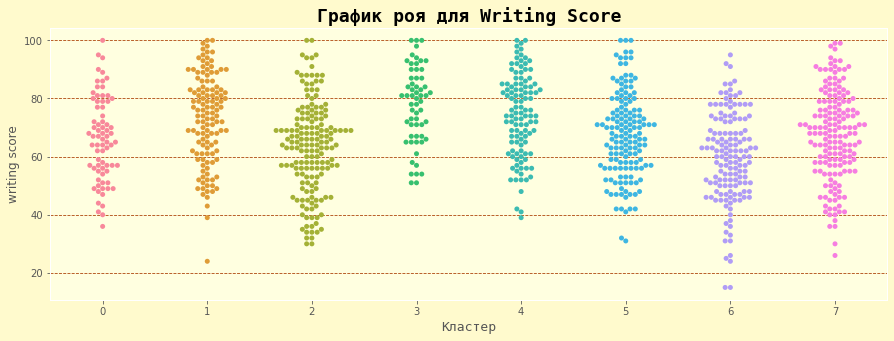

In [459]:
plt.figure(figsize=(15,5))
sns.swarmplot(data=df, x='cluster', y='writing score')
plt.title("График роя для Writing Score" , size=18, fontweight='bold', fontfamily='monospace')
plt.xlabel("Кластер", size=13, fontweight='light', fontfamily='monospace')
plt.show()

----

Графики, конечно, отображают общую картину разделения на кластеры, но чтобы однозначно что-то сказать необходимо высчитать  средние значения для каждого кластера по оценкам за "math", "reading" и "writing".

In [460]:
df_cls = df.groupby('cluster')['math score','reading score','writing score'].mean()
df_cls['Среднее значение'] = df_cls.mean(axis=1)
df_cls.style.background_gradient("Reds")

,math score,reading score,writing score,Среднее значение
cluster,,,,
0,64.310811,67.081081,66.216216,65.869369
1,70.352000,72.888000,72.976000,72.072000
2,60.736527,64.880240,63.143713,62.920160
3,74.066667,77.500000,77.750000,76.438889
4,76.873874,76.135135,74.351351,75.786787
5,65.033557,68.785235,67.503356,67.107383
6,58.806897,62.186207,59.627586,60.206897
7,65.485207,68.550296,67.467456,67.167653


Отсортируем значения

In [461]:
df_cls = df.groupby('cluster')['math score','reading score','writing score'].mean()
df_cls['Среднее значение'] = df_cls.mean(axis=1)
df_cls.sort_values('Среднее значение', axis=0).style.background_gradient("Reds")

,math score,reading score,writing score,Среднее значение
cluster,,,,
6,58.806897,62.186207,59.627586,60.206897
2,60.736527,64.880240,63.143713,62.920160
0,64.310811,67.081081,66.216216,65.869369
5,65.033557,68.785235,67.503356,67.107383
7,65.485207,68.550296,67.467456,67.167653
1,70.352000,72.888000,72.976000,72.072000
4,76.873874,76.135135,74.351351,75.786787
3,74.066667,77.500000,77.750000,76.438889


Как можно заметить, самой отстающей группой (кластером) студентов является 6-я, а самой преуспевающей 3-я, но не однозначно. К примеру, если посмотреть на средние оценки студентов 3 и 4 групп по математике (math score), то можно заметить, что во 4 группе этот показатель даже выше, но из-за общей картины по всем предметам 4-я группа не самая “успешная”. 

----

 Проведем подробный анализ двух лучших (3 и 4) и худшей (6) групп студентов.

In [479]:
# извините за мой "французский" и столь грязный код, но я не смог сообразить и найти более ёмкое решение
# я догадываюсь, что эти действия можно было сделать при помощи уже существующих методов на датафрейме "X_df"
# при первой возможности (подсказке) исправлю весь этот кошмар

df_anls = X_df
df_anls['cluster'] = y_pred
df_anls_clust = pd.DataFrame(df_anls[df_anls["cluster"] == 3].ne(0).sum())
df_anls_clust.columns = ['3 cluster']
df_anls_clust['4 cluster'] = df_anls[ df_anls["cluster"] == 4 ].ne(0).sum().values
df_anls_clust['6 cluster'] = df_anls[ df_anls["cluster"] == 6 ].ne(0).sum().values
df_anls_clust = df_anls_clust.drop(['math score', 'reading score', 'writing score'])

df_anls_clust['3 проценты (%)'] = np.nan
df_anls_clust['3 проценты (%)']['female'] = (df_anls_clust['3 cluster']['female'] / df_anls_clust['3 cluster']['female':'male'].sum()) * 100
df_anls_clust['3 проценты (%)']['male'] = (df_anls_clust['3 cluster']['male'] / df_anls_clust['3 cluster']['female':'male'].sum()) * 100
df_anls_clust['3 проценты (%)']['group A'] = (df_anls_clust['3 cluster']['group A'] / df_anls_clust['3 cluster']['group A':'group E'].sum()) * 100
df_anls_clust['3 проценты (%)']['group B'] = (df_anls_clust['3 cluster']['group B'] / df_anls_clust['3 cluster']['group A':'group E'].sum()) * 100
df_anls_clust['3 проценты (%)']['group C'] = (df_anls_clust['3 cluster']['group C'] / df_anls_clust['3 cluster']['group A':'group E'].sum()) * 100
df_anls_clust['3 проценты (%)']['group D'] = (df_anls_clust['3 cluster']['group D'] / df_anls_clust['3 cluster']['group A':'group E'].sum()) * 100
df_anls_clust['3 проценты (%)']['group E'] = (df_anls_clust['3 cluster']['group E'] / df_anls_clust['3 cluster']['group A':'group E'].sum()) * 100
df_anls_clust['3 проценты (%)']["associate's degree"] = (df_anls_clust['3 cluster']["associate's degree"] / df_anls_clust['3 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['3 проценты (%)']["bachelor's degree"] = (df_anls_clust['3 cluster']["bachelor's degree"] / df_anls_clust['3 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['3 проценты (%)']["high school"] = (df_anls_clust['3 cluster']["high school"] / df_anls_clust['3 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['3 проценты (%)']["master's degree"] = (df_anls_clust['3 cluster']["master's degree"] / df_anls_clust['3 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['3 проценты (%)']["some college"] = (df_anls_clust['3 cluster']["some college"] / df_anls_clust['3 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['3 проценты (%)']["some high school"] = (df_anls_clust['3 cluster']["some high school"] / df_anls_clust['3 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['3 проценты (%)']['free/reduced'] = (df_anls_clust['3 cluster']['free/reduced'] / df_anls_clust['3 cluster']['free/reduced':'standard'].sum()) * 100
df_anls_clust['3 проценты (%)']['standard'] = (df_anls_clust['3 cluster']['standard'] / df_anls_clust['3 cluster']['free/reduced':'standard'].sum()) * 100
df_anls_clust['3 проценты (%)']['completed'] = (df_anls_clust['3 cluster']['completed'] / df_anls_clust['3 cluster']['completed':'none'].sum()) * 100
df_anls_clust['3 проценты (%)']['none'] = (df_anls_clust['3 cluster']['none'] / df_anls_clust['3 cluster']['completed':'none'].sum()) * 100

df_anls_clust['4 проценты (%)'] = np.nan
df_anls_clust['4 проценты (%)']['female'] = (df_anls_clust['4 cluster']['female'] / df_anls_clust['4 cluster']['female':'male'].sum()) * 100
df_anls_clust['4 проценты (%)']['male'] = (df_anls_clust['4 cluster']['male'] / df_anls_clust['4 cluster']['female':'male'].sum()) * 100
df_anls_clust['4 проценты (%)']['group A'] = (df_anls_clust['4 cluster']['group A'] / df_anls_clust['4 cluster']['group A':'group E'].sum()) * 100
df_anls_clust['4 проценты (%)']['group B'] = (df_anls_clust['4 cluster']['group B'] / df_anls_clust['4 cluster']['group A':'group E'].sum()) * 100
df_anls_clust['4 проценты (%)']['group C'] = (df_anls_clust['4 cluster']['group C'] / df_anls_clust['4 cluster']['group A':'group E'].sum()) * 100
df_anls_clust['4 проценты (%)']['group D'] = (df_anls_clust['4 cluster']['group D'] / df_anls_clust['4 cluster']['group A':'group E'].sum()) * 100
df_anls_clust['4 проценты (%)']['group E'] = (df_anls_clust['4 cluster']['group E'] / df_anls_clust['4 cluster']['group A':'group E'].sum()) * 100
df_anls_clust['4 проценты (%)']["associate's degree"] = (df_anls_clust['4 cluster']["associate's degree"] / df_anls_clust['4 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['4 проценты (%)']["bachelor's degree"] = (df_anls_clust['4 cluster']["bachelor's degree"] / df_anls_clust['4 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['4 проценты (%)']["high school"] = (df_anls_clust['4 cluster']["high school"] / df_anls_clust['4 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['4 проценты (%)']["master's degree"] = (df_anls_clust['4 cluster']["master's degree"] / df_anls_clust['4 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['4 проценты (%)']["some college"] = (df_anls_clust['4 cluster']["some college"] / df_anls_clust['4 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['4 проценты (%)']["some high school"] = (df_anls_clust['4 cluster']["some high school"] / df_anls_clust['4 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['4 проценты (%)']['free/reduced'] = (df_anls_clust['4 cluster']['free/reduced'] / df_anls_clust['4 cluster']['free/reduced':'standard'].sum()) * 100
df_anls_clust['4 проценты (%)']['standard'] = (df_anls_clust['4 cluster']['standard'] / df_anls_clust['4 cluster']['free/reduced':'standard'].sum()) * 100
df_anls_clust['4 проценты (%)']['completed'] = (df_anls_clust['4 cluster']['completed'] / df_anls_clust['4 cluster']['completed':'none'].sum()) * 100
df_anls_clust['4 проценты (%)']['none'] = (df_anls_clust['4 cluster']['none'] / df_anls_clust['4 cluster']['completed':'none'].sum()) * 100

df_anls_clust['6 проценты (%)'] = np.nan
df_anls_clust['6 проценты (%)']['female'] = (df_anls_clust['6 cluster']['female'] / df_anls_clust['6 cluster']['female':'male'].sum()) * 100
df_anls_clust['6 проценты (%)']['male'] = (df_anls_clust['6 cluster']['male'] / df_anls_clust['6 cluster']['female':'male'].sum()) * 100
df_anls_clust['6 проценты (%)']['group A'] = (df_anls_clust['6 cluster']['group A'] / df_anls_clust['6 cluster']['group A':'group E'].sum()) * 100
df_anls_clust['6 проценты (%)']['group B'] = (df_anls_clust['6 cluster']['group B'] / df_anls_clust['6 cluster']['group A':'group E'].sum()) * 100
df_anls_clust['6 проценты (%)']['group C'] = (df_anls_clust['6 cluster']['group C'] / df_anls_clust['6 cluster']['group A':'group E'].sum()) * 100
df_anls_clust['6 проценты (%)']['group D'] = (df_anls_clust['6 cluster']['group D'] / df_anls_clust['6 cluster']['group A':'group E'].sum()) * 100
df_anls_clust['6 проценты (%)']['group E'] = (df_anls_clust['6 cluster']['group E'] / df_anls_clust['6 cluster']['group A':'group E'].sum()) * 100
df_anls_clust['6 проценты (%)']["associate's degree"] = (df_anls_clust['6 cluster']["associate's degree"] / df_anls_clust['6 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['6 проценты (%)']["bachelor's degree"] = (df_anls_clust['6 cluster']["bachelor's degree"] / df_anls_clust['6 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['6 проценты (%)']["high school"] = (df_anls_clust['6 cluster']["high school"] / df_anls_clust['6 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['6 проценты (%)']["master's degree"] = (df_anls_clust['6 cluster']["master's degree"] / df_anls_clust['6 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['6 проценты (%)']["some college"] = (df_anls_clust['6 cluster']["some college"] / df_anls_clust['6 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['6 проценты (%)']["some high school"] = (df_anls_clust['6 cluster']["some high school"] / df_anls_clust['6 cluster']["associate's degree":"some high school"].sum()) * 100
df_anls_clust['6 проценты (%)']['free/reduced'] = (df_anls_clust['6 cluster']['free/reduced'] / df_anls_clust['6 cluster']['free/reduced':'standard'].sum()) * 100
df_anls_clust['6 проценты (%)']['standard'] = (df_anls_clust['6 cluster']['standard'] / df_anls_clust['6 cluster']['free/reduced':'standard'].sum()) * 100
df_anls_clust['6 проценты (%)']['completed'] = (df_anls_clust['6 cluster']['completed'] / df_anls_clust['6 cluster']['completed':'none'].sum()) * 100
df_anls_clust['6 проценты (%)']['none'] = (df_anls_clust['6 cluster']['none'] / df_anls_clust['6 cluster']['completed':'none'].sum()) * 100

df_anls_clust 


,3 cluster,4 cluster,6 cluster,3 проценты (%),4 проценты (%),6 проценты (%)
female,36,54,69,60.000000,48.648649,47.586207
male,24,57,76,40.000000,51.351351,52.413793
group A,3,0,1,5.000000,0.000000,0.689655
group B,9,0,48,15.000000,0.000000,33.103448
group C,26,12,57,43.333333,10.810811,39.310345
group D,14,2,39,23.333333,1.801802,26.896552
group E,8,97,0,13.333333,87.387387,0.000000
associate's degree,0,20,0,0.000000,18.018018,0.000000
bachelor's degree,0,0,0,0.000000,0.000000,0.000000
high school,0,51,145,0.000000,45.945946,100.000000


----

Совпадение или нет, но у лучшей группы студентов (3-й) процентное соотношение женщин больше, чем мужчин, но во 4 группе, где практически поровну мужчин и женщин математику сдали лучше. А вот у самой худшей группы (6-й) студентов мужского пола больше. Не в обиду мужскому населению Земли, но это говорит лишь о том, что у женщин успеваемость лучше, что повлияло на итоговую картину.

Принадлежность к этнической группе тоже говорит о многом: группы «C» и «E» являются самыми умными, кем бы они не являлись. Именно из-за этого 3 и 4 кластеры имеют столь высокую успеваемость. Да, в кластере 6 тоже есть довольно высокий процент учащихся, принадлежащих к группе «С», но так как людей в сумме в этой группе больше и примерно такой же процент имеют группа «В», можно сделать вывод, что люди, относящиеся к этнической группе «В» являются абузой, занижающей общий балл по экзаменам.
    
Образование родителей показывает, что родители, закончившие среднюю школу теряют интерес к образованию своих детей, что в итоге сказывается на их успеваемости. Интересно подметить, что у лучшей группы (3-й) 100% родителей имеют магистерское образование, а у худшей (6-й) 100% закончили среднюю школу (аналогия российской школы для людей в возрасте от 14 до 18 лет). Во второй группе студентов (практически лучшей по успеваемости) 50% родителей не остановились на одной средней школе, а пошли дальше в своем развитии, получив более дорогое (во всех смыслах) образование, или углубились в профессиональные навыки, получив несколько образований в колледжах.

Про ланч можно сказать, что это незначимый параметр, так как процентное соотношение бесплатного/льготного и стандартного обеда в лучших и худшей группах практически одинаковое. Да, у 6-й группы чуть больше льготников, но это лишь связано с тем, что не у всех людей без высшего образования всё хорошо с семейным положением или даже “хромает” здоровье (за счет чего их детям положены льготы на питание).

И что наверное самое важное и интересное – это подготовительные курсы (след. таблица). 

In [480]:
df_anls_clust["associate's degree":"some high school"] 
df_anls_clust['completed':'none']
df_anls_clust.iloc[[7,8,9,10,11,12,15,16],:]

,3 cluster,4 cluster,6 cluster,3 проценты (%),4 проценты (%),6 проценты (%)
associate's degree,0,20,0,0.000000,18.018018,0.000000
bachelor's degree,0,0,0,0.000000,0.000000,0.000000
high school,0,51,145,0.000000,45.945946,100.000000
master's degree,60,0,0,100.000000,0.000000,0.000000
some college,0,24,0,0.000000,21.621622,0.000000
some high school,0,16,0,0.000000,14.414414,0.000000
completed,13,53,32,21.666667,47.747748,22.068966
none,47,58,113,78.333333,52.252252,77.931034


У лучшей (3-й) и худшей (6-й) групп одинаковые соотношения наличия прохождения курсов подготовки, а у 4-й группы практически половина успешно завершили подготовку. Теперь необходимо вспомнить образование родителей у этих групп. Хотя только половина студентов из 4-й группы завершили подготовительные курсы, наличие высшего образования у 50% родителей дали положительные результаты (50% студентов не проходили курс подготовки и у этой же группы студентов 50% родителей с высшим образованием – совпадение? Не думаю.) Тем временем, с одинаковой процентной статистикой по завершению курсов 3-я и 6-я группы имеют совершенно противоположную успеваемость, что опять же говорит об эффективности помощи и поддержки более образованных родителей (100% магистров у 3-й группы против 100% со школьным образованием у 6-й группы).



----

## ВЫВОДЫ 
После полного анализа собранного датафрейма можно сделать вывод, что неважно кем родился студент и какой ланч у него в учебном заведении. Два главных, основополагающих фактора это непосредственно поддержка родителей в учебном процессе и обязательное успешное завершение подготовительных курсов. 

Рекомендации, которые можно посоветовать для данного УЗ – это разработать более эффективный план для стимуляции абитуриентов пройти подготовительные курсы (в США [откуда и был взят данный датафрейм] курсы для подготовки проводят сторонние организации, заинтересованные в получении прибыли с людей, хотящих поступить в именитое УЗ). 

Рекомендации для родителей абитуриентов: быть готовым помогать своему ребенку в его начинаниях познании науки. 

Для самих же абитуриентов рекомендации дать затруднительно, так как данное учебное заведение полностью толерантно ко всем, и остается полагаться лишь на своё желание учиться, не оглядываясь на успехи родителей. И даже если в их семье не одобряют получить образование в этом УЗ (так как родители, по всей видимости, разочаровались в образовательной системе США) всегда можно пройти соответствующие курсы и иметь шанс попасть в группы лучших студентов, если основываться на статистике.